In [ ]:
# to remove left handed participants' data
# to replace outliers with mean
# 2-4-outliersbye-lh_aparc_modified_for_aseg_stats file was modified on 4-16-24-Tue
# - to count the number of right and left handedness subjects
# - NOT to make the means and stdevs are update everytime this script is ran

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.__version__)
#!pip install --upgrade pandas

2.0.3


In [15]:
table = pd.read_csv("merged_vol_hand_npt_lh_aparc.csv")

print(table.shape[0])  #subject number n = 431
table.head(2)

431


,Unnamed: 0,Unnamed: 1,Study_ID,Age,Edu,NPT_date,TOPF_raw,TOPF_Actual_SS,TOPF_Pred_SS,WTAR_raw,...,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,frontalpole,temporalpole,transversetemporal,insula,Handedness
0,H3333782,2018-07-25,880e4a2d,89.0,15,2018-07-25 00:00:00,37,100.0,109.0,NaN,...,10762,18475,12136,8383,9468,859,892,948,6460,1.0
1,H4140979,2018-03-26,84dd85aa,69.0,16,2018-03-26 00:00:00,28,88.0,113.0,NaN,...,15141,21207,10916,11593,11167,1094,2401,1274,6629,1.0


In [16]:
# Drop left-handed subject's data

# count the number of right - left handedness subjects
table = pd.read_csv("merged_vol_hand_npt_lh_aparc.csv")
total_n = len(table)
left_n = len(table[table['Handedness'] == 2 ])
right_n = len(table[table['Handedness'] == 1])
print(f"total_n :                  {total_n}")
print(f"left handedness subjects : {left_n} \nright handed subjects :    {right_n}")
print(f"\n{total_n} - {left_n} - {right_n} = {total_n-left_n-right_n}")




#rows_to_drop = table[table['Handedness'] > 1] 
rows_to_drop = table[(table['Handedness'] > 1) | table['Handedness'].isna()] 
# 1: right handed |  2: left handed  #I saw 3 in my dataset, so  > 1 instead of == 2 
# dropped the missing handedness subjects as well
# print("rows_to_drop :{} " .format(rows_to_drop))

table = table.drop(rows_to_drop.index, axis = 0).reset_index(drop=True)
print(f"\nAfter drop the left handedness subj and anything not right handedness : {table.shape[0]}")  #updated  - subject number n = 392
len(table[table['Handedness'] == 1])

total_n :                  431
left handedness subjects : 38 
right handed subjects :    391

431 - 38 - 391 = 2

After drop the left handedness subj and anything not right handedness : 391


391

In [17]:
#stats
print(table['Age'].mean()) # 70.785166
print(table['bankssts'].mean()) # 1959.867007
table.describe()


70.81025641025641
1959.8670076726344


,Age,TOPF_Actual_SS,TOPF_Pred_SS,WRAT4_Read_SS,MMSE_Tot,MoCA_MIS,WAIS4_Sim_raw,WAIS4_Sim_ss,WAIS4_BD_raw,WAIS4_BD_ss,...,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,frontalpole,temporalpole,transversetemporal,insula,Handedness
count,390.000000,94.000000,90.000000,4.000000,0.0,0.0,299.000000,299.000000,242.000000,242.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.0
mean,70.810256,103.148936,109.011111,93.250000,NaN,NaN,23.635452,10.150502,29.739669,9.500000,...,12593.506394,18792.734015,11325.281330,10355.859335,9322.028133,881.780051,2252.475703,989.611253,6416.797954,1.0
std,9.374521,12.765846,7.863290,7.632169,NaN,NaN,6.012086,2.887271,11.119979,3.520244,...,1992.297057,2669.013259,1747.924872,1678.984512,1714.778395,151.866533,431.069027,210.976502,869.760095,0.0
min,44.000000,64.000000,81.000000,82.000000,NaN,NaN,2.000000,2.000000,0.000000,1.000000,...,6166.000000,10167.000000,6329.000000,5925.000000,5148.000000,461.000000,446.000000,546.000000,3990.000000,1.0
25%,65.000000,93.250000,103.250000,91.750000,NaN,NaN,20.000000,8.000000,24.000000,8.000000,...,11297.000000,16984.000000,10084.500000,9151.500000,8112.500000,788.500000,2002.000000,835.500000,5824.500000,1.0
50%,71.500000,104.000000,112.000000,96.500000,NaN,NaN,24.000000,10.000000,28.000000,9.000000,...,12507.000000,18766.000000,11156.000000,10334.000000,9158.000000,872.000000,2237.000000,960.000000,6377.000000,1.0
75%,78.000000,113.000000,115.000000,98.000000,NaN,NaN,28.000000,12.000000,36.000000,11.000000,...,13861.500000,20593.500000,12442.500000,11366.500000,10216.500000,972.000000,2525.500000,1130.000000,6963.000000,1.0
max,92.000000,123.000000,122.000000,98.000000,NaN,NaN,42.000000,16.000000,64.000000,40.000000,...,19553.000000,28919.000000,18698.000000,15355.000000,16528.000000,1519.000000,3512.000000,1717.000000,9917.000000,1.0


In [18]:
print(table['Age'].mean()) #70.8102564
print(table['bankssts'].mean()) #1959.867007
table.describe() #before dropping the left-handed, missing handedness, 3, 70.6581 | after 70.8102564

70.81025641025641
1959.8670076726344


,Age,TOPF_Actual_SS,TOPF_Pred_SS,WRAT4_Read_SS,MMSE_Tot,MoCA_MIS,WAIS4_Sim_raw,WAIS4_Sim_ss,WAIS4_BD_raw,WAIS4_BD_ss,...,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,frontalpole,temporalpole,transversetemporal,insula,Handedness
count,390.000000,94.000000,90.000000,4.000000,0.0,0.0,299.000000,299.000000,242.000000,242.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.0
mean,70.810256,103.148936,109.011111,93.250000,NaN,NaN,23.635452,10.150502,29.739669,9.500000,...,12593.506394,18792.734015,11325.281330,10355.859335,9322.028133,881.780051,2252.475703,989.611253,6416.797954,1.0
std,9.374521,12.765846,7.863290,7.632169,NaN,NaN,6.012086,2.887271,11.119979,3.520244,...,1992.297057,2669.013259,1747.924872,1678.984512,1714.778395,151.866533,431.069027,210.976502,869.760095,0.0
min,44.000000,64.000000,81.000000,82.000000,NaN,NaN,2.000000,2.000000,0.000000,1.000000,...,6166.000000,10167.000000,6329.000000,5925.000000,5148.000000,461.000000,446.000000,546.000000,3990.000000,1.0
25%,65.000000,93.250000,103.250000,91.750000,NaN,NaN,20.000000,8.000000,24.000000,8.000000,...,11297.000000,16984.000000,10084.500000,9151.500000,8112.500000,788.500000,2002.000000,835.500000,5824.500000,1.0
50%,71.500000,104.000000,112.000000,96.500000,NaN,NaN,24.000000,10.000000,28.000000,9.000000,...,12507.000000,18766.000000,11156.000000,10334.000000,9158.000000,872.000000,2237.000000,960.000000,6377.000000,1.0
75%,78.000000,113.000000,115.000000,98.000000,NaN,NaN,28.000000,12.000000,36.000000,11.000000,...,13861.500000,20593.500000,12442.500000,11366.500000,10216.500000,972.000000,2525.500000,1130.000000,6963.000000,1.0
max,92.000000,123.000000,122.000000,98.000000,NaN,NaN,42.000000,16.000000,64.000000,40.000000,...,19553.000000,28919.000000,18698.000000,15355.000000,16528.000000,1519.000000,3512.000000,1717.000000,9917.000000,1.0


In [24]:
# percentage of missing valuees
print(table['Age'].mean()) #70.81025641025641
missing_values = table.isnull().sum()
percentage_of_missing_value = missing_values[missing_values > 0]/len(table) * 100
percentage_of_missing_value

70.81025641025641


Age                     0.255754
Edu                     1.023018
NPT_date                0.255754
TOPF_raw               75.447570
TOPF_Actual_SS         75.959079
                         ...    
ADL_total              42.710997
FRSBE_before           98.721228
FRSBE_after            99.232737
NPIq_total_severity    99.744246
NPIq_total_stress      99.744246
Length: 365, dtype: float64

70.81025641025641
1959.8670076726344


<Axes: >

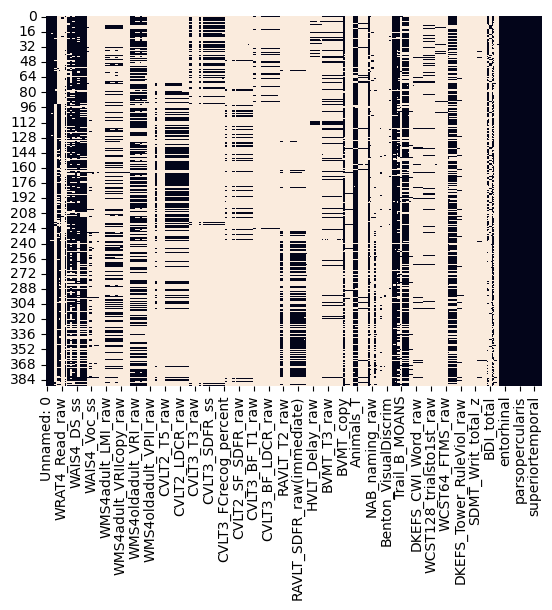

In [25]:
# visualizing the missing values
print(table['Age'].mean()) #70.8102564
print(table['bankssts'].mean()) #1959.867007
sns.heatmap(table.isnull(), cbar = False)

In [26]:
# grab the colums of interests

print(table['Age'].mean()) # 70.8102564
missing_percentage = (table.isnull().sum() / len(table)) * 100
columns_to_drop = percentage_of_missing_value[percentage_of_missing_value > 30].index
#print("columns to drop : \n{}".format(columns_to_drop))
table_new = table.drop(columns_to_drop, axis = 1)
# drop some more
table_new.drop([
       'Unnamed: 0', 'Unnamed: 1','WAIS4_Sim_raw', 'WAIS4_Sim_ss', 'WAIS4_MR_raw', 'WAIS4_MR_ss',
       'WAIS4_DS_raw', 'WAIS4_DS_ss', 'WAIS4_DSfwd_raw','WAIS4_DSfwd_span','WAIS4_DSbwd_raw','WAIS4_DSbwd_span',        'WAIS4_Dsseq_raw','WAIS4_Dsseq_span', 'RCFT_Copy_raw', 'RCFT_Copy_percentile','TrailsA_time_raw',
       'TrailsA_time_T', 'TrailsA_err', 'TrailsB_time_raw', 'TrailsB_time_T',
       'TrailsB_err', 'Stroop_Word_raw', 'Stroop_Word_T', 'Stroop_Color_raw',
       'Stroop_Color_T', 'Stroop_CW_raw', 'Stroop_CW_T', 'mWCST_Categ_raw',
       'PHQ9_total'],axis=1,inplace=True)


print("the number of columns: {}" .format(table_new.shape[1]))
table_new.columns
print(table_new['Age'].mean()) # 70.8102564
print(table_new['bankssts'].mean()) # 1959.8670076726344

70.81025641025641
the number of columns: 45
70.81025641025641
1959.8670076726344


In [ ]:
#for the future reference

#filling of missing values - replace missing values with their mode
#df['Age']=df['Age'].fillna(df['Age'].mode()[0])
#df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [31]:
# Replace the outliers with the mean
print("-"*15, 'before replacing the outliers with the mean', "-"*15)
print(table_new['Age'].mean()) # 70.81025641025641  
print("the number of columns: {}" .format(table_new.shape[1]))
#table_new.columns
print(table_new['Age'].mean())  # 70.81025641025641  
print(table_new['bankssts'].mean())  # 3138.9554987212277

print("-"*15, 'after replacing the outliers with the mean', "-"*15)
table_new_copy = table_new.copy()
mean_list = []
std_list = []
number_of_row = []
columns_to_skip = ['NPT_date', 'Study_ID']
for i in table_new_copy.columns:
    if i not in columns_to_skip:
        if table_new_copy[i].dtype == 'object':
            table_new_copy[i] = pd.to_numeric(table_new_copy[i], errors='coerce')

        mean = table_new_copy[i].mean()
        std = table_new_copy[i].std()

        mean_list.append(mean)
        std_list.append(std)

        low = mean - (3 * std)
        high = mean + (3 * std)
        outliers = table_new_copy[(table_new_copy[i] < low) | (table_new_copy[i] > high)]
        #print("{}'s outliers: {}" .format(i, outliers))
        outliers_index = outliers.index

        #table_new.drop(outliers_index,inplace=True)
        table_new_copy.loc[outliers_index,i] = mean # replaced the outliers with mean
        number_of_row.append(table_new_copy[i].shape[0])
        print("{} : {}".format(i, table_new_copy[i].shape[0]))


--------------- before replacing the outliers with the mean ---------------
70.81025641025641
the number of columns: 45
70.81025641025641
1959.8670076726344
--------------- after replacing the outliers with the mean ---------------
Age : 391
Edu : 391
FAS_total_raw : 391
FAS_total_T : 391
Animals_raw : 391
Animals_T : 391
BNT_totalwstim_raw : 391
BNT_totalwstim_T : 391
bankssts : 391
caudalanteriorcingulate : 391
caudalmiddlefrontal : 391
cuneus : 391
entorhinal : 391
fusiform : 391
inferiorparietal : 391
inferiortemporal : 391
isthmuscingulate : 391
lateraloccipital : 391
lateralorbitofrontal : 391
lingual : 391
medialorbitofrontal : 391
middletemporal : 391
parahippocampal : 391
paracentral : 391
parsopercularis : 391
parsorbitalis : 391
parstriangularis : 391
pericalcarine : 391
postcentral : 391
posteriorcingulate : 391
precentral : 391
precuneus : 391
rostralanteriorcingulate : 391
rostralmiddlefrontal : 391
superiorfrontal : 391
superiorparietal : 391
superiortemporal : 391
supra

def distributionGraph(df):
    for col in df.columns:
        plt.figure(figsize=(8,6))
        plt.hist(df[col], bins = 20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [33]:
table_new_copy.to_csv('2-4-outliersbye-lh_aparc.csv', index = False)
print(table_new_copy['Age'].mean()) # 70.81025641025641   
print(table_new_copy['bankssts'].mean()) #  1947.0271125908387 #new mean bc outliers were replaced

70.81025641025641
1947.0271125908387
